<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Classification: Predicting Left-Handedness from Psychological Factors

---

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [3]:
# library imports
import pandas as pd
data = pd.read_csv('data.csv', delimiter='\t')
print(data.head())

   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  country  fromgoogle  engnat  \
0   4   1   5   1   5   1   5   1   4    1  ...       US           2       1   
1   1   5   1   4   2   5   5   4   1    5  ...       CA           2       1   
2   1   2   1   1   5   4   3   2   1    4  ...       NL           2       2   
3   1   4   1   5   1   4   5   4   3    5  ...       US           2       1   
4   5   1   5   1   5   1   5   1   3    1  ...       US           2       1   

   age  education  gender  orientation  race  religion  hand  
0   22          3       1            1     3         2     3  
1   14          1       2            2     6         1     1  
2   30          4       1            1     1         1     2  
3   18          2       2            5     3         2     2  
4   22          3       1            1     3         2     3  

[5 rows x 56 columns]


---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

In [16]:
print(data.describe())

                Q1           Q2           Q3           Q4           Q5  \
count  4184.000000  4184.000000  4184.000000  4184.000000  4184.000000   
mean      1.962715     3.829589     2.846558     3.186902     2.865440   
std       1.360291     1.551683     1.664804     1.476879     1.545798   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     3.000000     1.000000     2.000000     1.000000   
50%       1.000000     5.000000     3.000000     3.000000     3.000000   
75%       3.000000     5.000000     5.000000     5.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                Q6           Q7           Q8           Q9          Q10  ...  \
count  4184.000000  4184.000000  4184.000000  4184.000000  4184.000000  ...   
mean      3.672084     3.216539     3.184512     2.761233     3.522945  ...   
std       1.342238     1.490733     1.387382     1.511805     1.242890  ...   
min       0.00000

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [18]:
data.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

In [19]:
data['hand'].value_counts()

hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64

In [20]:
data['hand'].value_counts(normalize=True)

hand
1    0.846558
2    0.108031
3    0.042782
0    0.002629
Name: proportion, dtype: float64

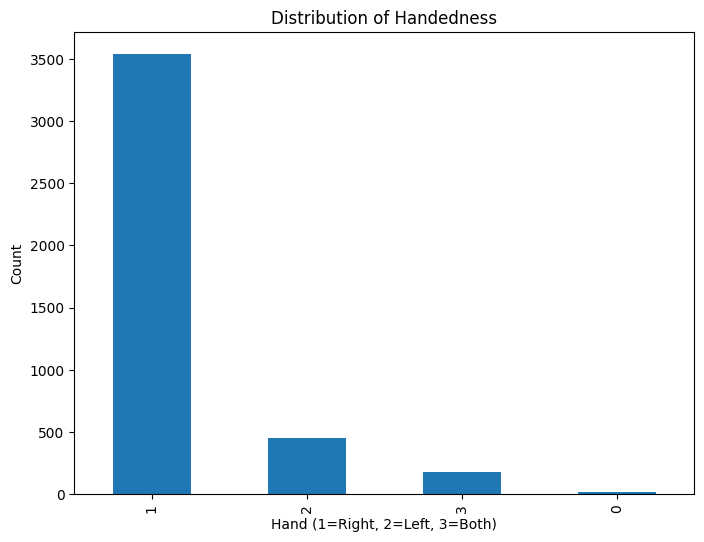

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['hand'].value_counts().plot(kind='bar')
plt.title('Distribution of Handedness')
plt.xlabel('Hand (1=Right, 2=Left, 3=Both)')
plt.ylabel('Count')
plt.show()

In [42]:
data['is_left_handed'] = (data['hand'] == 2).astype(int)
print(data['is_left_handed'].value_counts())

is_left_handed
0    3732
1     452
Name: count, dtype: int64


In [50]:
Q_cols = []

# Step 2: Use a for loop to add each question name to the list
for i in range(1, 45):
    question_name = 'Q' + str(i)  # Create string like 'Q1', 'Q2', etc.
    Q_cols.append(question_name)  # Add it to our list

# Let's see what we created
print("Our list of question columns:")
print(Q_cols)

Our list of question columns:
['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44']


In [51]:
# Find the smallest value across all questions
smallest_value = questions_data.min().min()

# Find the largest value across all questions  
largest_value = questions_data.max().max()

# Print the result
print(f"\nThe questions use scores from {smallest_value} to {largest_value}")


The questions use scores from 0 to 5


### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

In [37]:
#classification

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

In [35]:
#### the purpose of doing standardization is to make features in same scale. In other words, to prevent domination from one feature on others
#### Example is to predict the price of houses (target) and the features are: house size and number of rooms

### 7. Give an example of when we might not standardize our variables.

In [38]:
# when the features have nearly similar ranges

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

In [ ]:
#Standardization ensures that each feature contributes equally to the distance metric used in KNN

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

In [ ]:
# we will consider only Q columns and ommit the other columns

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be all Q columns. 
- (Optional : You may use stratify = 'y')

I'll first create my `X` and `y` dataframes:

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data[q_columns]
y = data['is_left_handed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [53]:
questions_data = data[Q_cols]

In [48]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best. 
 - try k=3,5,15, and 25

In [54]:
k_values = [3, 5, 15, 25]
results = {}

for k in k_values:
    # Train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    results[k] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'model': knn
    }
    
    print(f"K={k}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

# Baseline accuracy (majority class)
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"\nBaseline accuracy (majority class): {baseline_accuracy:.4f}")

K=3: Train Accuracy = 0.9064, Test Accuracy = 0.8591
K=5: Train Accuracy = 0.8975, Test Accuracy = 0.8822
K=15: Train Accuracy = 0.8931, Test Accuracy = 0.8893
K=25: Train Accuracy = 0.8931, Test Accuracy = 0.8893

Baseline accuracy (majority class): 0.8893


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

Training Accuracy: 0.8931
Testing Accuracy:  0.8893


In [57]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [60]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

Precision: 0.2857
Recall:    0.0432
